# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

**Цели:**
- Промаркировать уровень финансовой активности постоянных покупателей.
- Собрать данные по клиентам

**Задачи:**
- Ислледовать данные
- Провести корреляционный анализ
- Выделите сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность.
- Разработать модели
- Выполните сегментацию покупателей
- Сделать выводы

**План действий**

**Шаг 1. Загрузка данных**

- [x] Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:
    - /datasets/market_file.csv
    - /datasets/market_money.csv
    - /datasets/market_time.csv
    - /datasets/money.csv

Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  
- [x] Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.

**Шаг 2. Предобработка данных**

- [x] Проведите необходимую предобработку данных.
- [x] Переименовать столбцы

**Шаг 3. Исследовательский анализ данных**

- [x] Проведите исследовательский анализ данных из каждой таблицы. 
- [x] Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. 
- [x] Оформите выводы по результатам шага.

**Шаг 4. Объединение таблиц**

- [x] Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
- [x] Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

**Шаг 5. Корреляционный анализ**

- [x] Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. 
- [x] Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

**Шаг 6. Использование пайплайнов**

- [x] Примените все изученные модели. Для этого используйте пайплайны.
- [x] Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
*Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.*
- [x] Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.
- [x] Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
    - использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
    - использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

**Шаг 7. Анализ важности признаков**

- [x] Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
- [x] Сделайте выводы о значимости признаков:
    - какие признаки мало значимы для модели;
    - какие признаки сильнее всего влияют на целевой признак;
    - как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

**Шаг 8. Сегментация покупателей**
- [x] Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
- [x] Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
    - Проведите графическое и аналитическое исследование группы покупателей.
    - Сделайте предложения по работе с сегментом для увеличения покупательской активности.
- [x] Сделайте выводы о сегментах:
    - какой сегмент вы взяли для дополнительного исследования,
    - какие предложения вы сделали и почему.

**Шаг 9. Общий вывод**
- [x] Сделайте общий вывод:
    - опишите задачу;
    - опишите исходные данные и проведённую предобработку;
    - напишите, что вы сделали для поиска лучшей модели;
    - укажите лучшую модель;
    - добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

## Загрузка данных

In [1]:
pip install phik

     |████████████████████████████████| 686 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

     |████████████████████████████████| 997 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import phik
import shap
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [290]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [291]:
market_file = pd.read_csv('/datasets/market_file.csv')

In [292]:
market_money = pd.read_csv('/datasets/market_money.csv')

In [293]:
market_time = pd.read_csv('/datasets/market_time.csv')

In [294]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [295]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [296]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [297]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [298]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Предобработка данных

In [299]:
market_file = market_file.rename(columns={
    'Покупательская активность':'activity',
    'Тип сервиса':'service_type',
    'Разрешить сообщать':'noatification',
    'Маркет_актив_6_мес':'interact_six_mth',
    'Маркет_актив_тек_мес':'interact_mth',
    'Длительность':'reg_duration',
    'Акционные_покупки':'promo_categ',
    'Популярная_категория':'popular_categ_six_mth',
    'Средний_просмотр_категорий_за_визит':'categ_watched_avg',
    'Неоплаченные_продукты_штук_квартал':'unpaid_bin_cnt_qtr',
    'Ошибка_сервиса':'error',
    'Страниц_за_визит':'avg_pages_per_visit_three_mth'
})

In [300]:
market_money = market_money.rename(columns={
    'Период':'period',
    'Выручка':'revenue'
})

In [301]:
market_time = market_time.rename(columns={
    'Период':'period',
    'минут':'minutes'
})

In [302]:
money = money.rename(columns={
    'Прибыль':'profit'
})

In [303]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1300 non-null   int64  
 1   activity                       1300 non-null   object 
 2   service_type                   1300 non-null   object 
 3   noatification                  1300 non-null   object 
 4   interact_six_mth               1300 non-null   float64
 5   interact_mth                   1300 non-null   int64  
 6   reg_duration                   1300 non-null   int64  
 7   promo_categ                    1300 non-null   float64
 8   popular_categ_six_mth          1300 non-null   object 
 9   categ_watched_avg              1300 non-null   int64  
 10  unpaid_bin_cnt_qtr             1300 non-null   int64  
 11  error                          1300 non-null   int64  
 12  avg_pages_per_visit_three_mth  1300 non-null   i

In [304]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [305]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2600 non-null   int64 
 1   period   2600 non-null   object
 2   minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [306]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [307]:
def unique_values(df):
    """
    Функция, которая показывает все уникальные значения
    для каждого столбца с типпом данных "строка" в датафрейме
    """
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        print(f'{col}, {df[col].unique()}')

In [308]:
unique_values(market_file)

activity, ['Снизилась' 'Прежний уровень']
service_type, ['премиум' 'стандартт' 'стандарт']
noatification, ['да' 'нет']
popular_categ_six_mth, ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [309]:
unique_values(market_money)

period, ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [310]:
unique_values(market_time)

period, ['текущий_месяц' 'предыдцщий_месяц']


In [311]:
unique_values(money)

In [312]:
market_file['service_type'] = market_file['service_type'].replace('стандартт', 'стандарт', regex=True)
market_file['popular_categ_six_mth'] = market_file['popular_categ_six_mth'].replace(
    'Косметика и аксесуары', 
    'Косметика и аксессуары', 
    regex=True
)
market_time['period'] = market_time['period'].replace('предыдцщий_месяц', 'предыдущий_месяц', regex=True)

In [313]:
def duplicates(df):
    """
    Функция, показывающая сумму дубликов
    """
    return df.duplicated().sum()

In [314]:
duplicates(market_file)

0

In [315]:
duplicates(market_money)

0

In [316]:
duplicates(market_time)

0

In [317]:
duplicates(money)

0

In [318]:
market_money[market_money.duplicated(keep=False)]

,id,period,revenue


In [319]:
market_money = market_money.drop_duplicates()

In [320]:
duplicates(market_money)

0

**Промежуточные выводы:**
- Были переименованы столбцы.
- Данные верхнеуровнево изучены.
- Были найдены неверно записанные данные, которые были успешно исправлены.
- Найдены дубликаты, которые успешно удалены.

## Исследовательский анализ данных

In [321]:
def circle_diagramm(data):
    '''
    Функция, которая строит круговые диагрыммы для 
    столбцов с типом данных 'object'
    '''
    object_cols = data.select_dtypes(include=['object']).columns
    
    for col in object_cols:
        count = data[col].value_counts()
        print(f'Круговая диаграмма {col}')
        display(count)
        count.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
        plt.ylabel('')
        plt.show()

In [322]:
def histogarmm(data):
    '''
    Функция, которая строит гистограммы для 
    столбцов с типом данных 'int' и 'float'
    '''
    numeric_cols = [col for col in data.select_dtypes(include=['int', 'float']).columns if col != 'id']
    
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        plt.title(f'Гистограмма {col}')
        data[col].hist(bins=50)
        plt.show()

In [323]:
def box_with_moustache(data):
    '''
    Функция, которая строит ящики с усами для 
    столбцов с типом данных 'int' и 'float'
    '''
    numeric_cols = data.select_dtypes(include=['int', 'float']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        data[col].plot.box()
        plt.title(f'Ящик с усами {col}')
        plt.ylabel(col)
        plt.show()

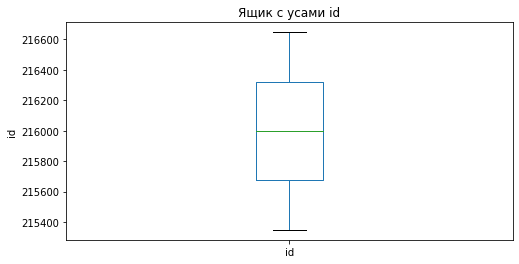

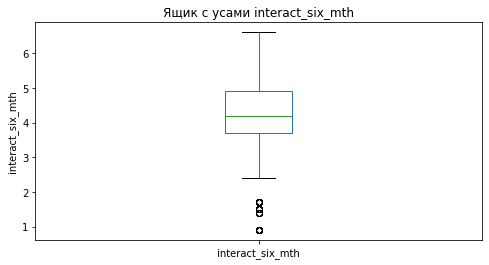

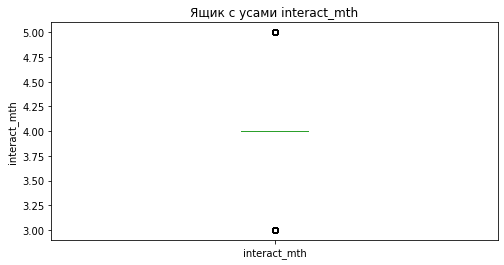

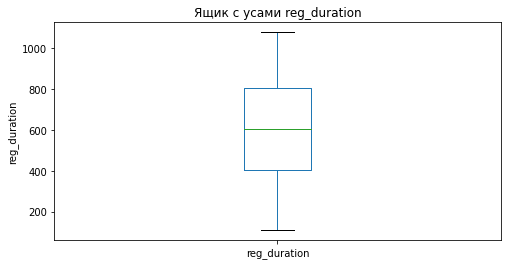

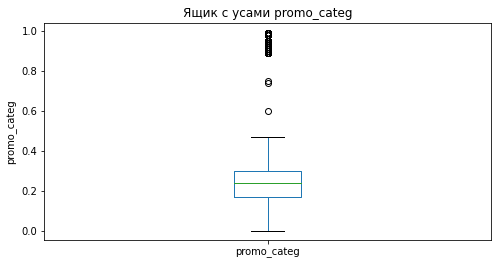

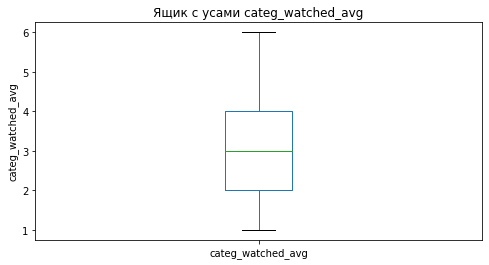

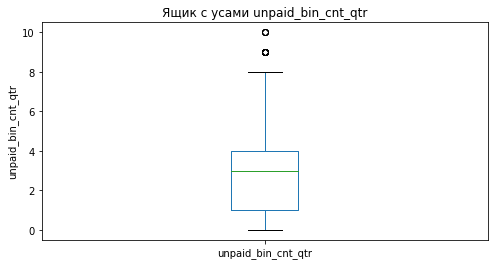

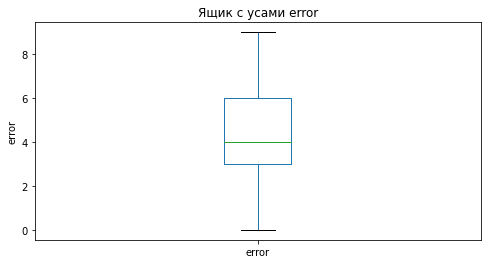

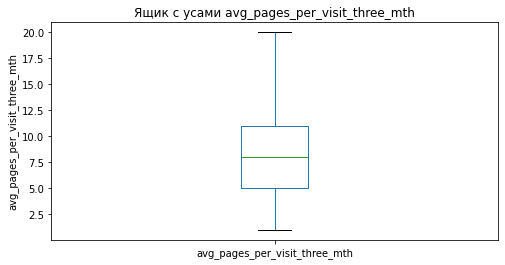

In [324]:
box_with_moustache(market_file)

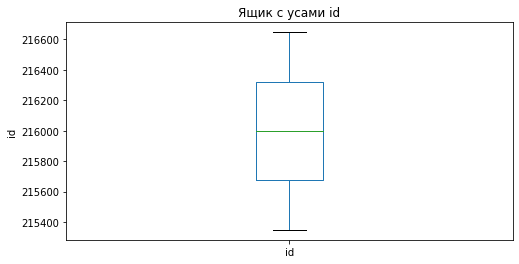

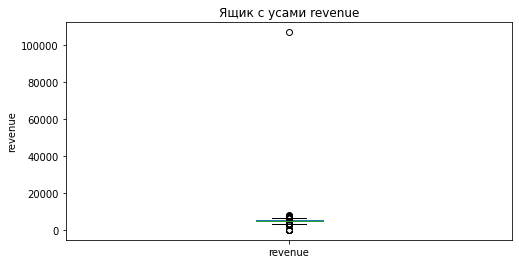

In [325]:
box_with_moustache(market_money)

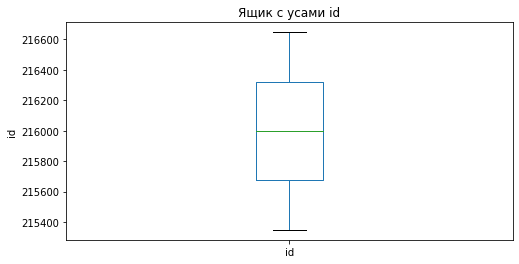

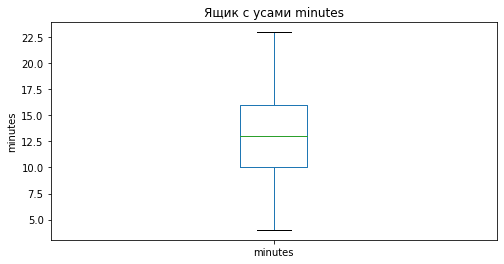

In [326]:
box_with_moustache(market_time)

В датафреймах market_file и market_time ничего "криминального" не замечено, в отличии от market_money: есть выручка за период более 100к руб., что настрожаивает, надо убрать выброс

In [327]:
market_money = market_money.query('revenue < 100000').reset_index(drop=True)

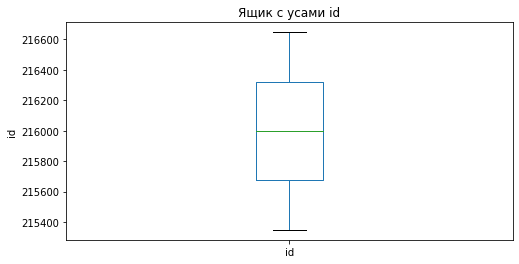

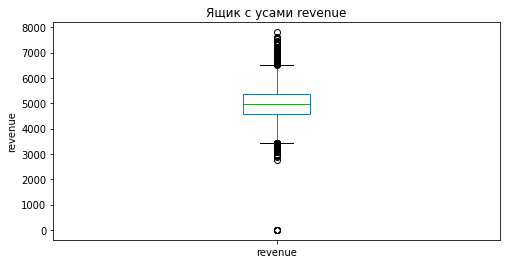

In [328]:
box_with_moustache(market_money)

Выброс удален

Круговая диаграмма activity


Прежний уровень    802
Снизилась          498
Name: activity, dtype: int64

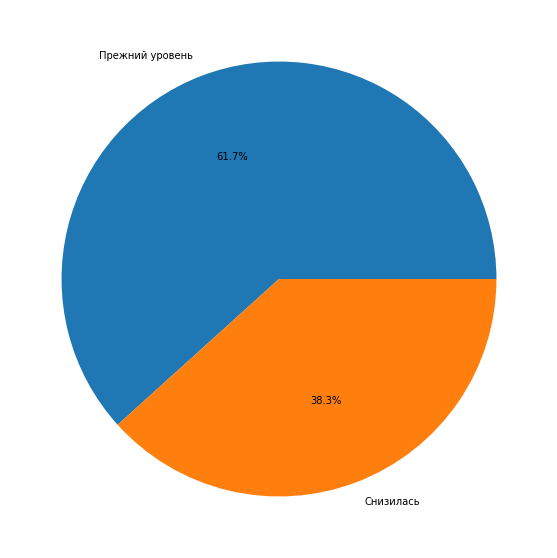

Круговая диаграмма service_type


стандарт    924
премиум     376
Name: service_type, dtype: int64

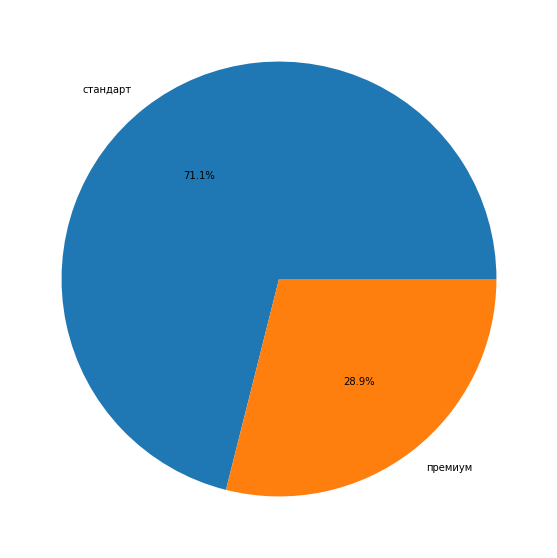

Круговая диаграмма noatification


да     962
нет    338
Name: noatification, dtype: int64

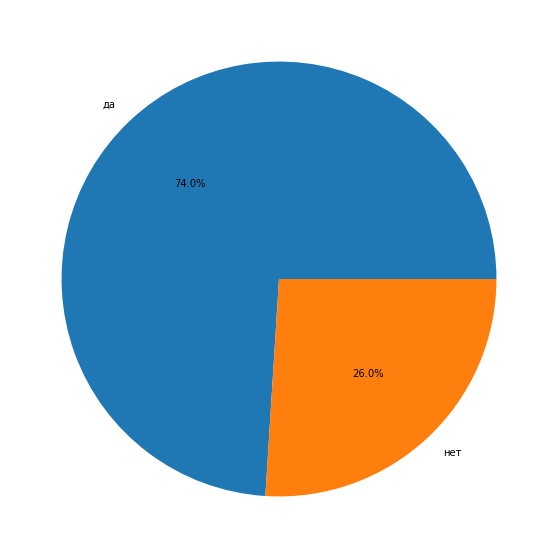

Круговая диаграмма popular_categ_six_mth


Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: popular_categ_six_mth, dtype: int64

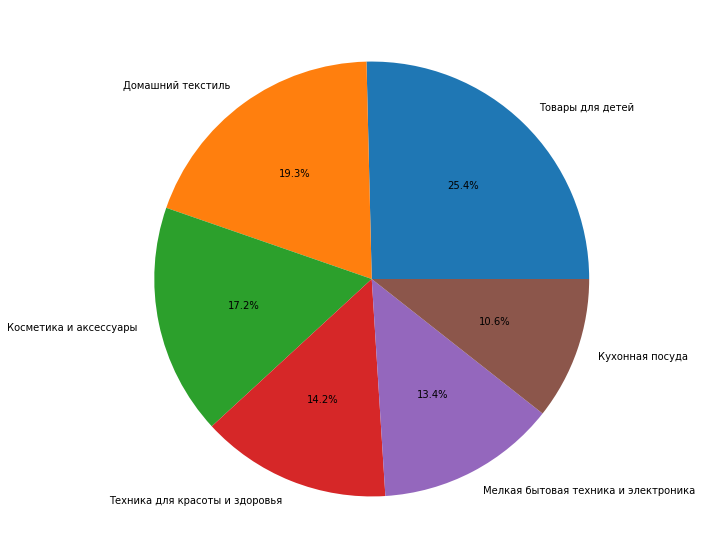

In [329]:
circle_diagramm(market_file)

- Большинство покупателей сохраняет активность
- Большинство покупателей утсраивает стандартный тип сервиса
- Большая часть покупателей имеет уведомления 
- В основном, все популярные категории разделяют одинаковуб часть рынка компании

Круговая диаграмма period


предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1299
Name: period, dtype: int64

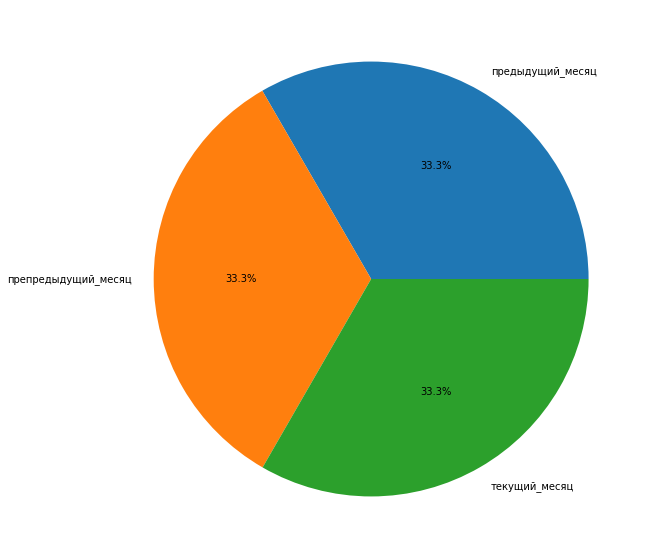

In [330]:
circle_diagramm(market_money)

- Большая часть выручки зафиксирована в предыдущем месяце

Круговая диаграмма period


текущий_месяц       1300
предыдущий_месяц    1300
Name: period, dtype: int64

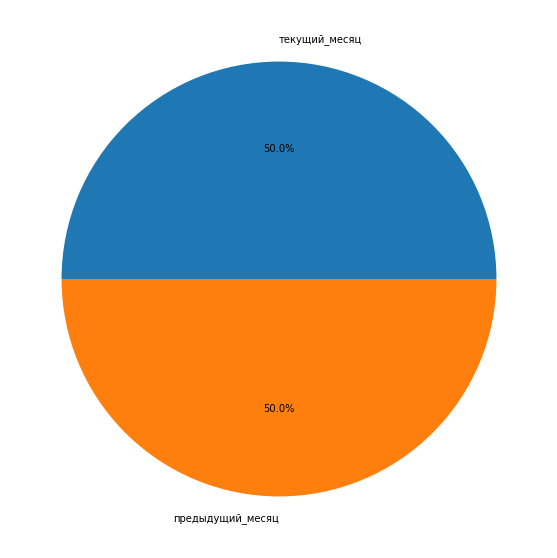

In [331]:
circle_diagramm(market_time)

- Большая часть проведенного времени на сайте зафиксировна поровну: в предыдущем месяце и в текущем

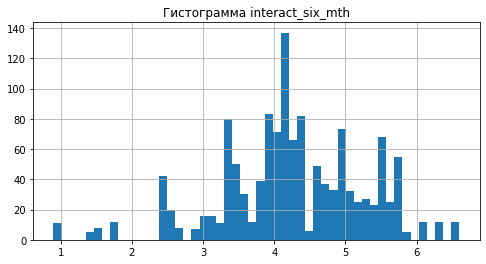

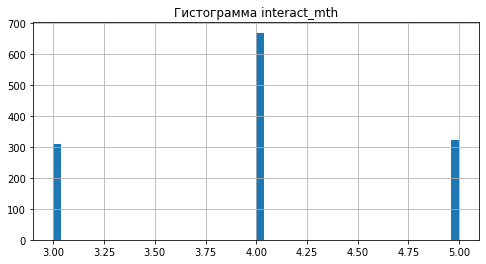

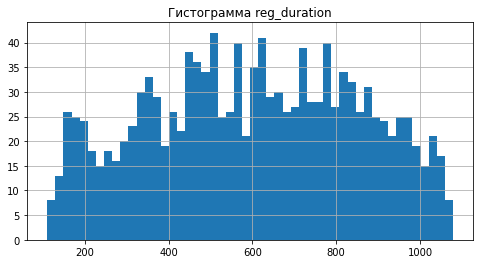

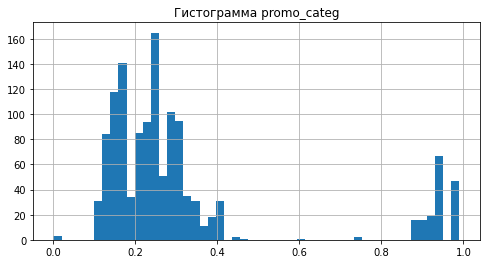

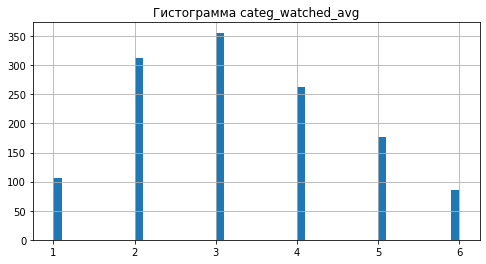

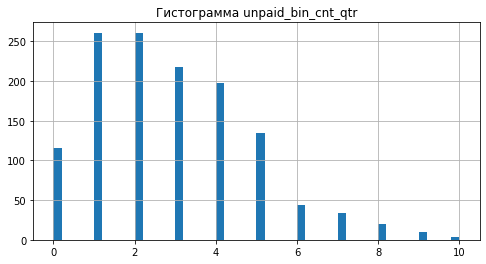

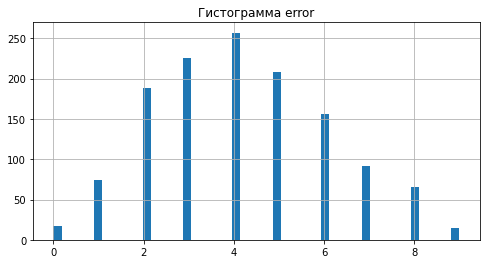

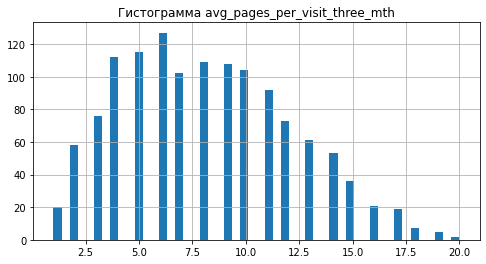

In [332]:
histogarmm(market_file)

- На всех графиках видна нормальное распределение, кроме акционных покупок. Возможно, в какой-то промежуток времени были не самые привлекательные акции

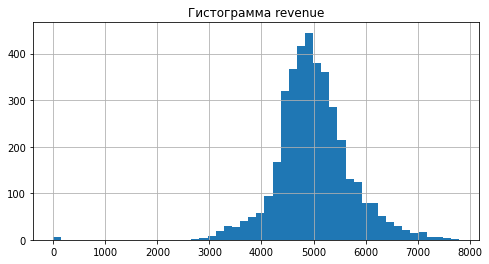

In [333]:
histogarmm(market_money)

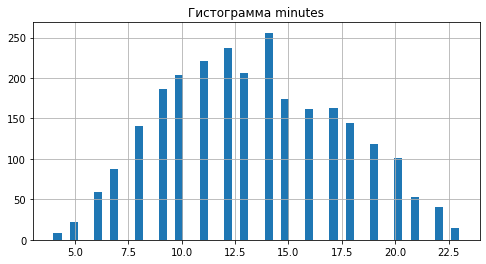

In [334]:
histogarmm(market_time)

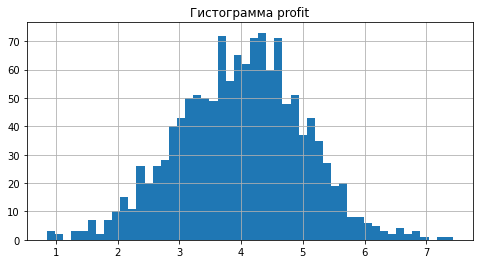

In [335]:
histogarmm(money)

- Оставшиеся данные распределены нормально 

In [336]:
market_money = market_money[market_money['revenue'] > 0]

In [337]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 1 to 3898
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3893 non-null   int64  
 1   period   3893 non-null   object 
 2   revenue  3893 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.7+ KB


**Промежуточные выводы**:
- В датафреймах market_file и market_time ничего "криминального" не замечено, в отличии от market_money: есть выручка за период более 100к руб., что настрожаивает, выброс был удален.
- Большинство покупателей сохраняет активность.
- Большинство покупателей утсраивает стандартный тип сервиса.
- Большая часть покупателей имеет уведомления.
- В основном, все популярные категории разделяют одинаковую часть рынка компании.
- Большая часть выручки зафиксирована в предыдущем месяце.
- Большая часть проведенного времени на сайте зафиксировна поровну: в предыдущем месяце и в текущем.
- На всех графиках видна нормальное распределение, кроме акционных покупок. Возможно, в какой-то промежуток времени были не самые привлекательные акции.
- Оставшиеся данные распределены нормально.
- Были отобраны клиенты с покупательской активностью не менее трёх месяцев, данные немного уменьшились (на 7 ед.).

## Объединение таблиц

In [338]:
market_money = market_money.pivot_table(index='id', columns='period', values='revenue')
market_money.columns = ['rev_prev_mth', 'rev_prevprev_mth', 'rev_cur_mth']
market_money.fillna(0, inplace=True) 
market_money.head()

,rev_prev_mth,rev_prevprev_mth,rev_cur_mth
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [339]:
market_time = market_time.pivot_table(index='id', columns='period', values='minutes')
market_time.columns = ['min_prev_mth', 'min_cur_mth']
market_time.head()

,min_prev_mth,min_cur_mth
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [340]:
market = market_file.merge(market_money, how='left', on='id')
market = market.merge(market_time, how='left', on='id')
market.head()

,id,activity,service_type,noatification,interact_six_mth,interact_mth,reg_duration,promo_categ,popular_categ_six_mth,categ_watched_avg,unpaid_bin_cnt_qtr,error,avg_pages_per_visit_three_mth,rev_prev_mth,rev_prevprev_mth,rev_cur_mth,min_prev_mth,min_cur_mth
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


## Корреляционный анализ

In [341]:
def corr_mat(df):
    '''
    Функция, которая строит матрицы с учетом категориальных признаков
    '''
    matrix = df.phik_matrix() 
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm')
    plt.show()

interval columns not set, guessing: ['id', 'interact_six_mth', 'interact_mth', 'reg_duration', 'promo_categ', 'categ_watched_avg', 'unpaid_bin_cnt_qtr', 'error', 'avg_pages_per_visit_three_mth', 'rev_prev_mth', 'rev_prevprev_mth', 'rev_cur_mth', 'min_prev_mth', 'min_cur_mth']


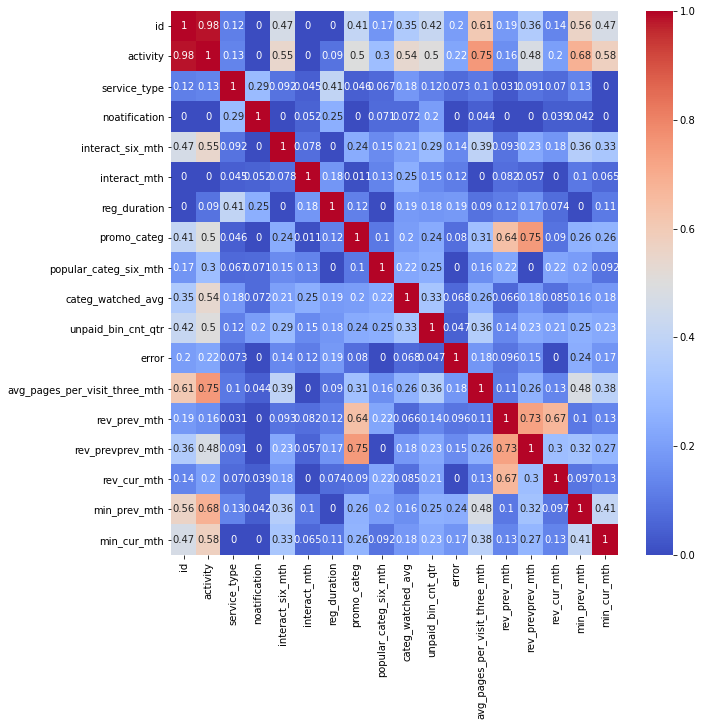

In [342]:
corr_mat(market)

Наблюдается мультиколлинеарность между id и активностью пользователей, надо убрать. Id не имеет предсказательного веса, но при этом просто избавиться я от него не могу, поэтому будет индексом. 

In [343]:
market.set_index('id', inplace=True)

interval columns not set, guessing: ['interact_six_mth', 'interact_mth', 'reg_duration', 'promo_categ', 'categ_watched_avg', 'unpaid_bin_cnt_qtr', 'error', 'avg_pages_per_visit_three_mth', 'rev_prev_mth', 'rev_prevprev_mth', 'rev_cur_mth', 'min_prev_mth', 'min_cur_mth']


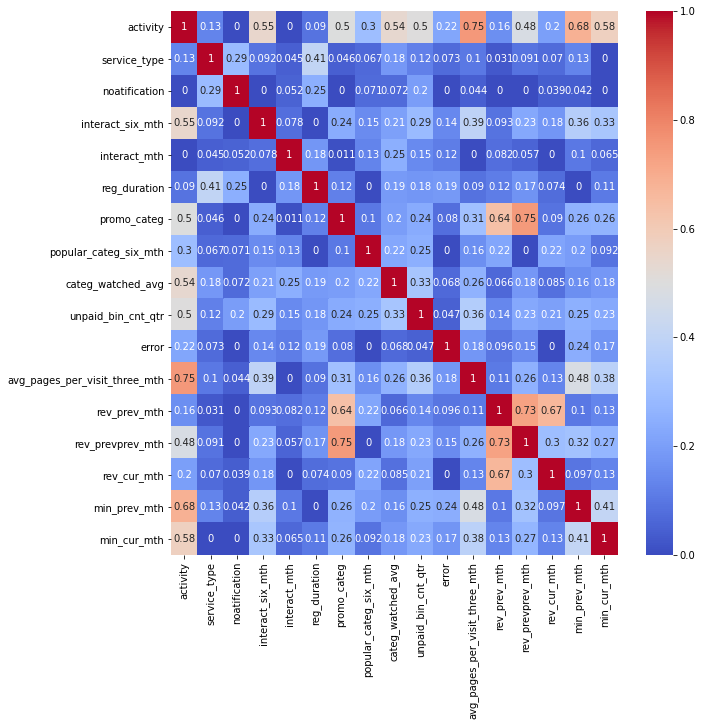

In [344]:
corr_mat(market)

Порядок

**Промужуточный вывод:**
- Была обнаружена мультиколлинеарность, которая была между id и активностью клиентом
- Id стал индексом, мультиколлинеарность исчезла

 ## Использование пайплайнов

In [345]:
X = market.drop('activity', axis=1)
y = market['activity']

In [346]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

In [347]:
num_col = [
    'interact_six_mth', 'interact_mth', 'reg_duration', 'promo_categ',
    'categ_watched_avg', 'unpaid_bin_cnt_qtr', 'avg_pages_per_visit_three_mth',
    'rev_prev_mth', 'rev_prevprev_mth', 'rev_cur_mth', 'min_prev_mth', 'min_cur_mth'
]
ohe_col = ['noatification', 'popular_categ_six_mth', 'error']
ord_col = ['service_type']

In [348]:
ohe_pipe = Pipeline(
    [
        (
            'SimpleImputerOhe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)
ohe_pipe

Pipeline(steps=[('SimpleImputerOhe', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(drop='first', sparse=False))])

In [349]:
ord_pipe = Pipeline(
    [
        (
            'SimpleImputer_BeforeOrd',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[['премиум', 'стандарт']], handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'SimpleImputer_AfterOrd',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)
ord_pipe

Pipeline(steps=[('SimpleImputer_BeforeOrd',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['премиум', 'стандарт']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('SimpleImputer_AfterOrd',
                 SimpleImputer(strategy='most_frequent'))])

In [350]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', MinMaxScaler(), num_col)
    ],
    remainder='passthrough'
)
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('SimpleImputerOhe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['noatification', 'popular_categ_six_mth',
                                  'error']),
                                ('ord',
                                 Pipeline(steps=[('SimpleImputer_BeforeOrd',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEnc...
                                                                 handle_unknown='use_en

In [351]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('SimpleImputerOhe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['noatification',
                                                   'popular_categ_six_mth',
                                                   'error']),
                                                 ('ord',
                                                  Pipeline(steps=[('SimpleImputer_BeforeOrd',
                             

In [352]:
param_grid = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 5, 10],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]
param_grid

[{'models': [KNeighborsClassifier()],
  'models__n_neighbors': range(2, 5),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [DecisionTreeClassifier(random_state=42)],
  'models__max_depth': range(2, 5),
  'models__max_features': range(2, 5),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [LogisticRegression(penalty='l1', random_state=42, solver='liblinear')],
  'models__C': range(1, 5),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [SVC(probability=True, random_state=42)],
  'models__C': [0.1, 1, 5, 10],
  'models__kernel': ['linear', 'rbf'],
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

In [353]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)
proba = randomized_search.predict_proba(X_test)[:, 1]

print(f'Лучшая модель: {randomized_search.best_estimator_}')
print(f'метрика лучшей модели: {randomized_search.best_score_}')
print(f'ROC-AUC: {roc_auc_score(y_test, proba)}')

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('SimpleImputerOhe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['noatification',
                                                   'popular_categ_six_mth',
                                                   'error']),
                                                 ('ord',
                                                  Pipeline(steps=[('SimpleImputer_BeforeOrd',
              

Я решил использовать метрику ROC-AUC. Метрика accuracy может быть вводящей в заблуждение, так как модель может показывать высокую точность, просто предсказывая более частый класс. ROC-AUC учитывает как истинные положительные, так и ложные положительные результаты, что позволяет более точно оценить производительность модели.

Лучшая модель - SVC c метриками best_estimator_ =  0.90 и ROC_AUC = 0.92

## Анализ важности признаков

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


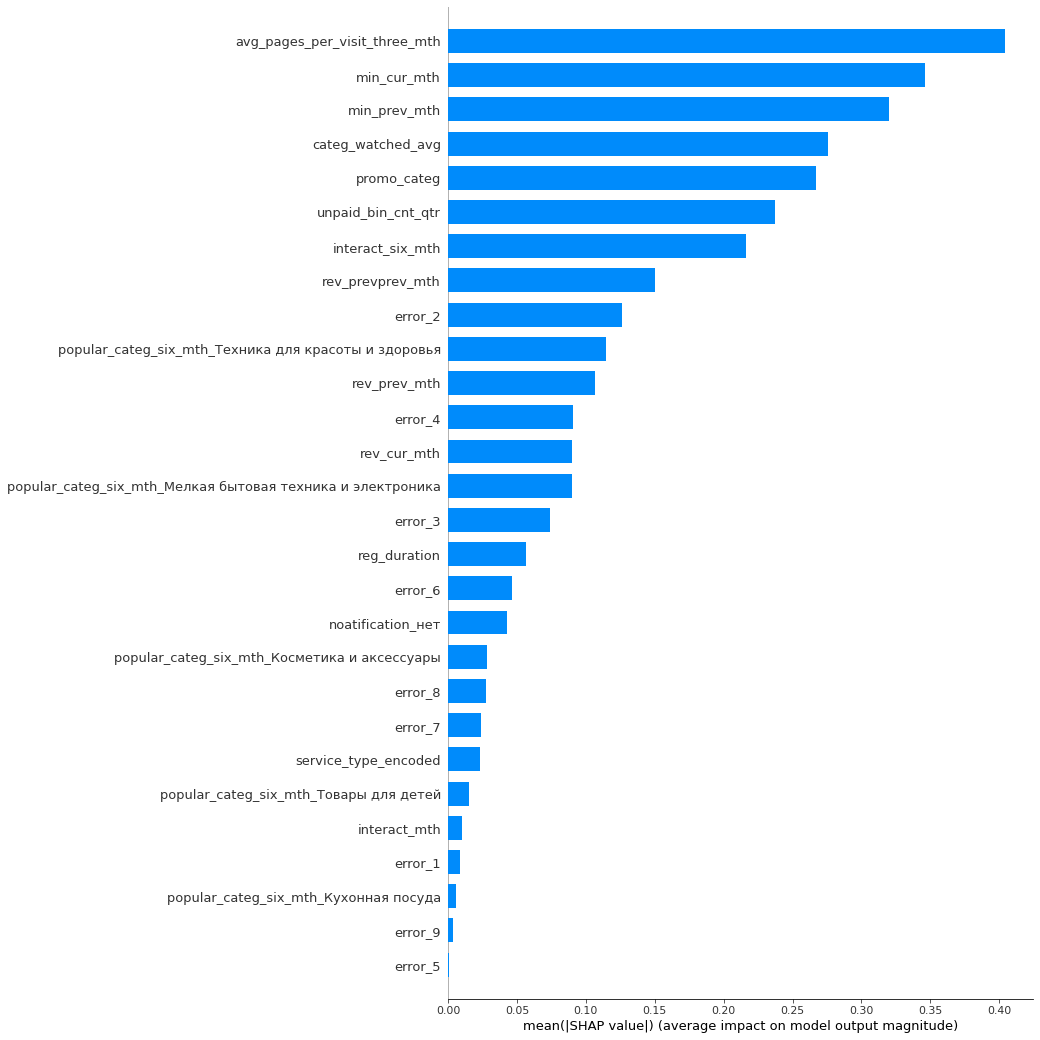

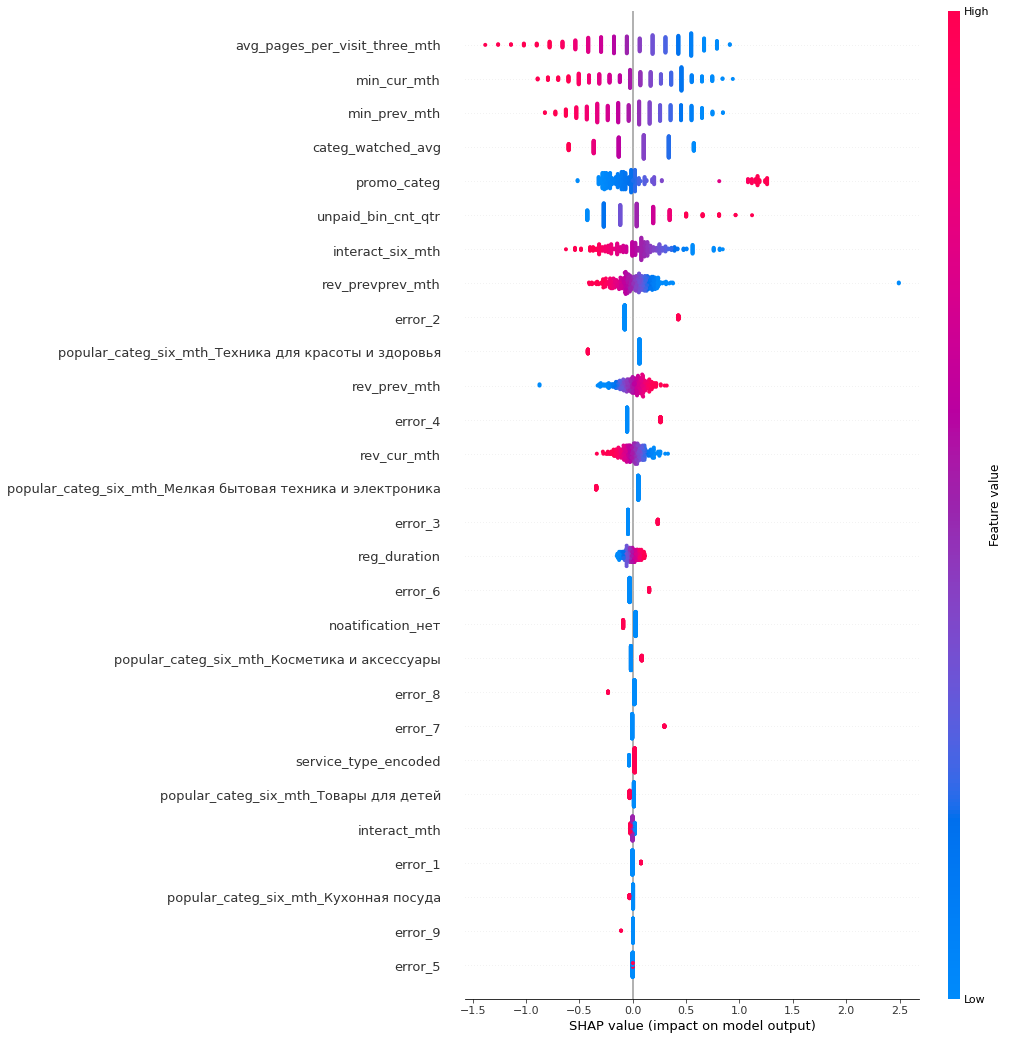

In [355]:
best_model = randomized_search.best_estimator_
preprocessor = best_model.named_steps['preprocessor']

X_train_exp = preprocessor.fit_transform(X_train)
X_test_exp = preprocessor.transform(X_test)

explainer = shap.LinearExplainer(best_model.named_steps['models'], X_train_exp)

ohe_step = preprocessor.named_transformers_['ohe']
ohe_encoder = ohe_step.named_steps['ohe']
ohe_names = ohe_encoder.get_feature_names(['noatification', 'popular_categ_six_mth', 'error'])
ord_names = ['service_type_encoded']
num_names = num_col
all_feature_names = list(ohe_names) + ord_names + num_names

shap_values = explainer(X_test_exp)

plt.rcParams.update({
    'font.size': 25,  
    'axes.titlesize': 25, 
    'axes.labelsize': 25, 
    'xtick.labelsize': 25,  
    'ytick.labelsize': 25,  
    'legend.fontsize': 25,  
    'figure.titlesize': 25 
})

shap.summary_plot(
    shap_values, 
    X_test_exp, 
    plot_type="bar", 
    max_display=30, 
    plot_size=(15, 15),
    feature_names=all_feature_names,
)

shap.summary_plot(
    shap_values, 
    X_test_exp, 
    plot_type="dot", 
    max_display=30, 
    plot_size=(15, 15),
    feature_names=all_feature_names,
)

plt.show()

**Промежуточный вывод:**
- Для модели наиболее важны Популярные категории за последние 6 месяцев(Мелкая бытовая техника и электроника), сколько категорий просматривают пользователи за одно посещение, акционные покупки и взаимодействие в последние 6 месяцев
- Признаки, имеющие больший разброс SHAP, оказывающие наибольшее влияние на предсказания модели:
    - avg_pages_per_visit_three_mth
    - min_cur_mth
    - min_prev_mth
    - categ_watched_avg
    - promo_categ
    - unpaid_bin_cnt_qtr
- Низкая значимость для модели:
    - виды ошибок
    - большая часть категорий
    - reg_duration
    - service_type_encoded
- Бизес - рекомендация:
avg_pages_per_visit_three_mth имеет большое влияние, это может указывать на то, что пользователи, интересующиеся платформой и посещающие разные страницы магазина за последние 3 месяца ииемют большее значение. Бизнес может сосредоточиться на более привлекательном внешнем виде сайта, сделать его интуитивно понятным.

## Сегментация покупателей

In [366]:
market_money = market.merge(money, on='id', how='left')

In [382]:
market_money.head()

,id,activity,service_type,noatification,interact_six_mth,interact_mth,reg_duration,promo_categ,popular_categ_six_mth,categ_watched_avg,...,avg_pages_per_visit_three_mth,rev_prev_mth,rev_prevprev_mth,rev_cur_mth,min_prev_mth,min_cur_mth,profit,predict_proba,activity_binary,key_segment
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,...,5,0.0,0.0,3293.1,13,14,0.98,0.813591,NaN,False
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5216.0,4472.0,4971.6,12,10,4.16,0.181667,NaN,False
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,5457.5,4826.0,5058.4,8,13,3.13,0.090822,NaN,False
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,6158.0,4793.0,6610.4,11,13,4.87,0.986204,NaN,True
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,2,5807.5,4594.0,5872.5,8,11,4.21,0.181097,NaN,False


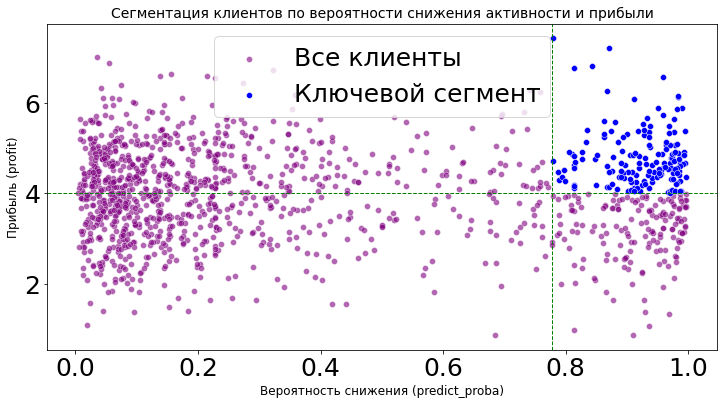

In [380]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

market_money['predict_proba'] = randomized_search.predict_proba(X_full)[:, 1]

#определение порогов
prob_threshold = np.percentile(market['predict_proba'], 75) #75 персентиль
profit_threshold = market_money['profit'].mean() #среднее по прибыли

market_money['key_segment'] = (
    (market_money['predict_proba'] > prob_threshold) &
    (market_money['profit'] > profit_threshold)
)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=market_money,
    x='predict_proba',
    y='profit',
    alpha=0.6,
    color='purple',
    label='Все клиенты'
)

sns.scatterplot(
    data=market_money[market_money['key_segment']],
    x='predict_proba',
    y='profit',
    color='blue',
    label='Ключевой сегмент'
)

plt.axvline(x=prob_threshold, color='green', linestyle='--', linewidth=1)
plt.axhline(y=profit_threshold, color='green', linestyle='--', linewidth=1)

plt.title('Сегментация клиентов по вероятности снижения активности и прибыли', fontsize=14)
plt.xlabel('Вероятность снижения (predict_proba)', fontsize=12)
plt.ylabel('Прибыль (profit)', fontsize=12)
plt.legend()

plt.show()

In [383]:
key_segment = market_money[market_money['key_segment']]
all_others = market_money[~market_money['key_segment']]

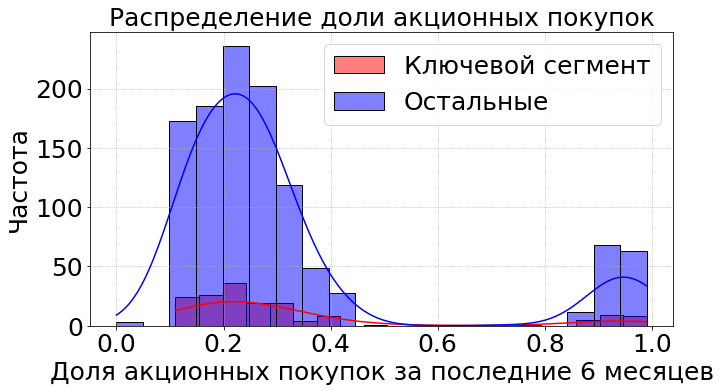

In [384]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=key_segment,
    x='promo_categ',
    color='red',
    label='Ключевой сегмент',
    kde=True,
    alpha=0.5,
    bins=20
)
sns.histplot(
    data=all_others,
    x='promo_categ',
    color='blue',
    label='Остальные',
    kde=True,
    alpha=0.5,
    bins=20
)
plt.title('Распределение доли акционных покупок')
plt.xlabel('Доля акционных покупок за последние 6 месяцев')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

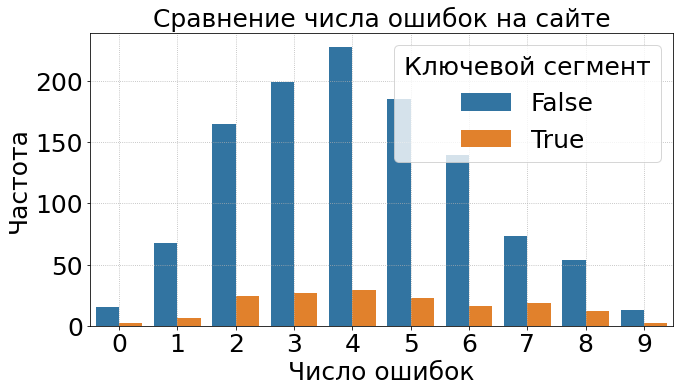

In [385]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=market_money,
    x='error',
    hue='key_segment'
)
plt.title('Сравнение числа ошибок на сайте')
plt.xlabel('Число ошибок')
plt.ylabel('Частота')
plt.legend(title='Ключевой сегмент')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

/tmp/ipykernel_48/3098824874.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


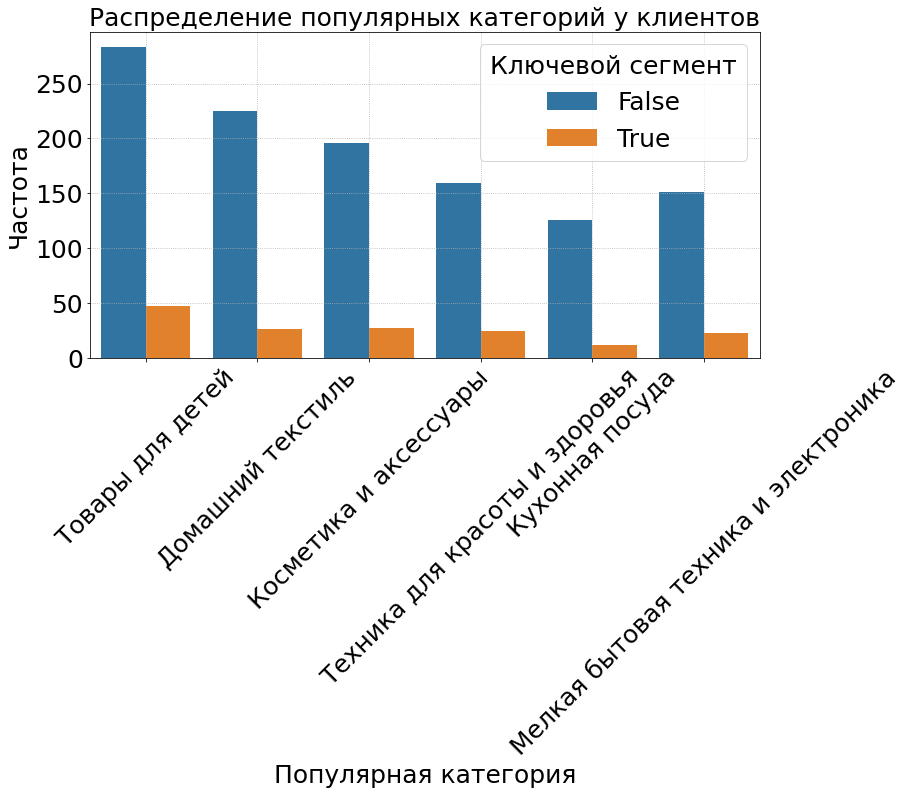

In [386]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=market_money,
    x='popular_categ_six_mth',
    hue='key_segment'
)
plt.title('Распределение популярных категорий у клиентов')
plt.xlabel('Популярная категория')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.legend(title='Ключевой сегмент')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

**Промежуточный вывод:**
- Клиенты ключевого сегмента в среднем совершают меньше акционных покупок, чем остальные клиенты.
- Доля клиентов с нулевыми акционными покупками выше среди ключевого сегмента.
- В ключевом сегменте наблюдается большее количество пользователей, сталкивающихся с ошибками на сайте.
- Распределение числа ошибок у ключевого сегмента смещено в сторону более высоких значений.
- Популярные категории среди ключевого сегмента — "Товары для детей" и "Домашний текстиль".
- Ключевой сегмент демонстрирует меньшую вариативность в выборе популярных категорий по сравнению с остальными клиентами.
- Среди остальных клиентов распределение популярных категорий более равномерное.
- Клиенты ключевого сегмента имеют более выраженные предпочтения в отдельных категориях.
- Наблюдается различие в структуре поведения между ключевым сегментом и остальными по уровню участия в акциях.
- Технические проблемы могут быть одним из факторов снижения активности у ключевого сегмента.
- Я предлагаю для улучшения ведения бизнеса анализировать предпочтения: определить категории товаров, которые были популярны у данной группы клиентов ранее, и предлагать им подобные товары, создавать рассылки, основываясь на истории покупок и просмотров клиентов, для клиентов с сниженной активностью можно создать ограниченные акции или скидки.
- Я решил выделить ключевой сегмент и посмотреть его соотношение к остальной массе данных.

## Общий вывод

- Передо мной стояла задача разработать решение для персонализации предложений постоянным клиентам с целью повышения их покупательской активности. В моем распоряжении были четыре таблицы:
    - Данные о поведении клиента на сайте.
    - Информация о выручке по каждому клиенту.
    - Время, проведённое клиентом на сайте.
    - Прибыль от клиента.
- Исходные данные имели в себе некотрые изъяны, которые были успешно исправлены:
    - Были переименованы столбцы.
    - Были найдены неверно записанные данные, которые были успешно исправлены.
    - Найдены дубликаты, которые успешно удалены.
- Для поиска лучшей модели был написан пайплайн, в котором находилось 4 модели с разными параметрами настроек (KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC))
- Лучшая модель выглядела так:
    - SVC
    - Параметры: C=1, kernel='linear', random_state=42
    - Метрика модели: 0.90
    - ROC-AUC: 0.92
- Рекомендации:
    - Бизес - рекомендация:  avg_pages_per_visit_three_mth имеет большое влияние, это может указывать на то, что пользователи, интересующиеся платформой и посещающие разные страницы магазина за последние 3 месяца ииемют большее значение. Бизнес может сосредоточиться на более привлекательном внешнем виде сайта, сделать его интуитивно понятным.    
    - Я предлагаю для улучшения ведения бизнеса анализировать предпочтения: определить категории товаров, которые были популярны у данной группы клиентов ранее, и предлагать им подобные товары, создавать рассылки, основываясь на истории покупок и просмотров клиентов, для клиентов с сниженной активностью можно создать ограниченные акции или скидки.
    - Я решил выделить ключевой сегмент и посмотреть его соотношение к остальной массе данных.
    - Клиенты ключевого сегмента в среднем совершают меньше акционных покупок, чем остальные клиенты.
    - Доля клиентов с нулевыми акционными покупками выше среди ключевого сегмента.
    - В ключевом сегменте наблюдается большее количество пользователей, сталкивающихся с ошибками на сайте.
    - Распределение числа ошибок у ключевого сегмента смещено в сторону более высоких значений.
    - Популярные категории среди ключевого сегмента — "Товары для детей" и "Домашний текстиль".
    - Ключевой сегмент демонстрирует меньшую вариативность в выборе популярных категорий по сравнению с остальными клиентами.
    - Среди остальных клиентов распределение популярных категорий более равномерное.
    - Клиенты ключевого сегмента имеют более выраженные предпочтения в отдельных категориях.
    - Наблюдается различие в структуре поведения между ключевым сегментом и остальными по уровню участия в акциях.
    - Технические проблемы могут быть одним из факторов снижения активности у ключевого сегмента.